# classification and regression

Supervised Learning means that we will have labeled historical data that we will use to inform our model. We call the label or thing we’re trying to predict, the target. So in supervised learning, there is a known target for the historical data, and for unsupervised learning there is no known target.


Within supervised learning, there is Classification and Regression. Classification problems are where the target is a categorical value (often True or False, but can be multiple categories). Regression problems are where the target is a numerical value.


**Logistic Regression, while it has regression in its name is an algorithm for solving classification problems, not regression problems.**

# Targets and Features

The **target** is the data that we are trying to predict

**Features** are the data we use to make our prediction

Sometimes you’ll hear features called predictors.

[https://www.symbolab.com/solver/step-by-step/Ax%2BBy%3DC](https://www.symbolab.com/solver/step-by-step/Ax%2BBy%3DC)

# Equation for the line
a line is defined by an equation in the following form



```
0 = ax + by + c
```



Let’s look at a specific example of a line where the coefficients are a=1, b=-1 and c=-30.


```
0 = (1)x + (-1)y + (-30)
```

The three coefficients are: 1, -1, -30

Recall that we’ve been plotting our data with x axis the Fare and y axis the Age of the passenger.

To draw a line from an equation, we need two points that are on the line.

We can see, for example, that the point (30, 0) lies right on the line (Fare 30, Age 0). If we plug it into the equation, it works out.


```
30 - 0 - 30 = 0
```
We can also see that the point (50, 20) is on the line (Fare 50, Age 20).


```
50 - 20 - 30 = 0
```

Here’s what our line looks like on the graph.
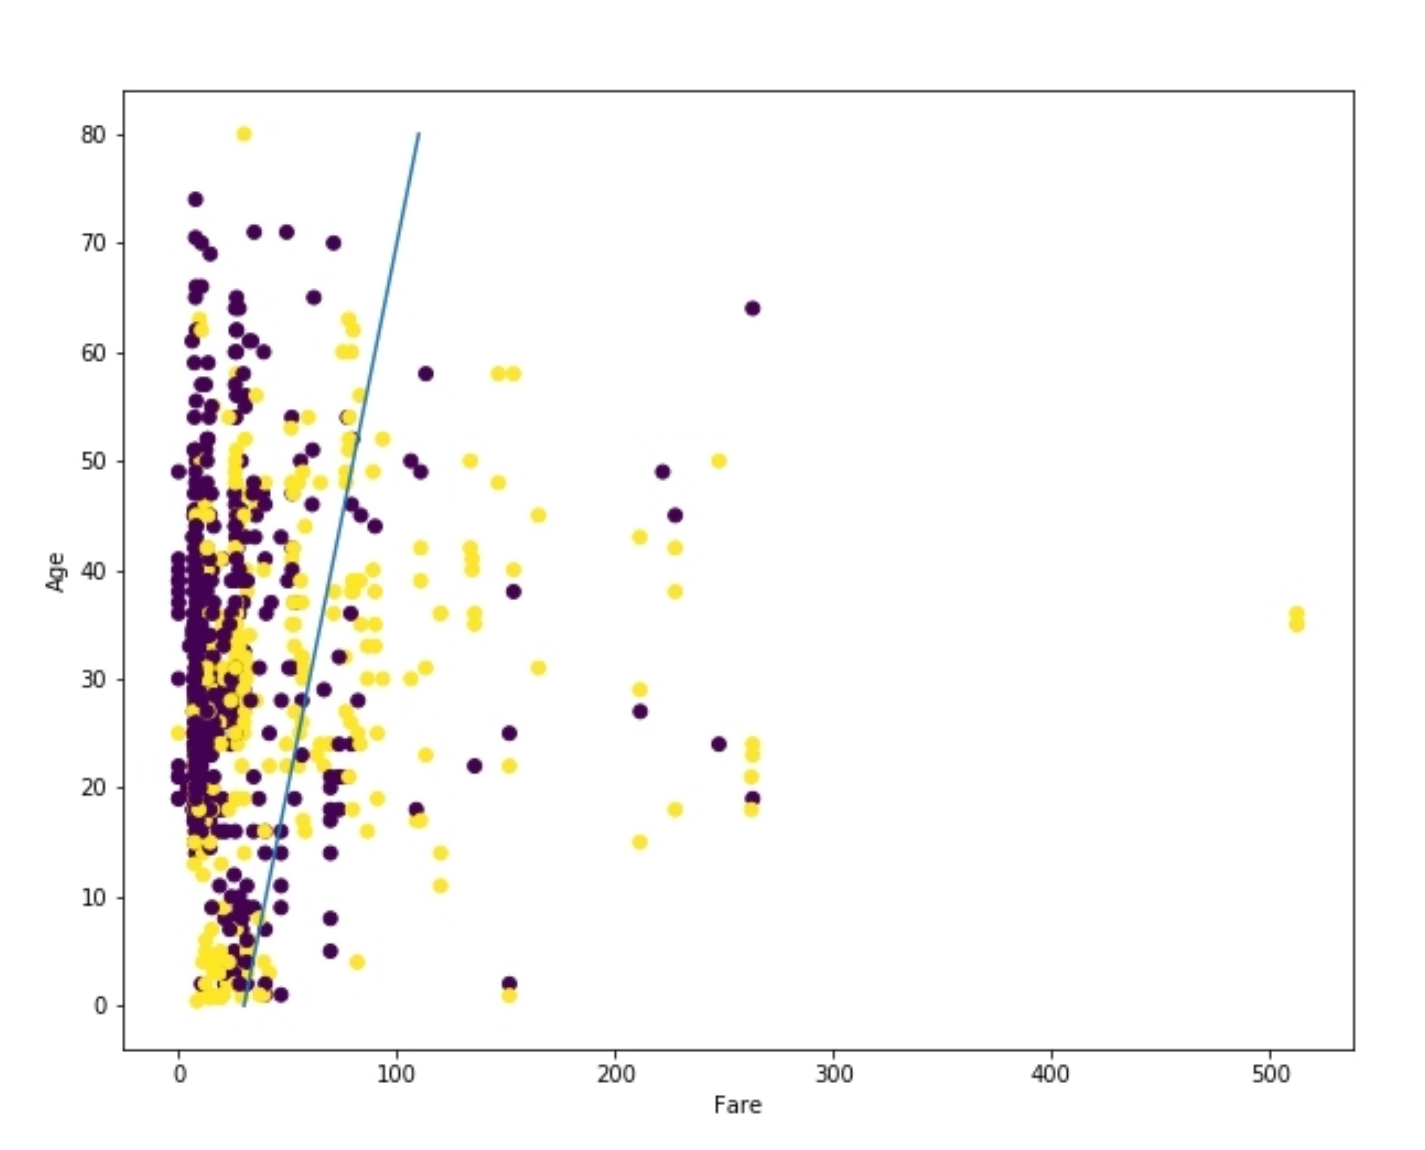


**Logistic Regression is a way of mathematically finding the best line.**

For each datapoint, we’ll have a score that’s a value between 0 and 1. We can think of it as the probability

This function is called the sigmoid.

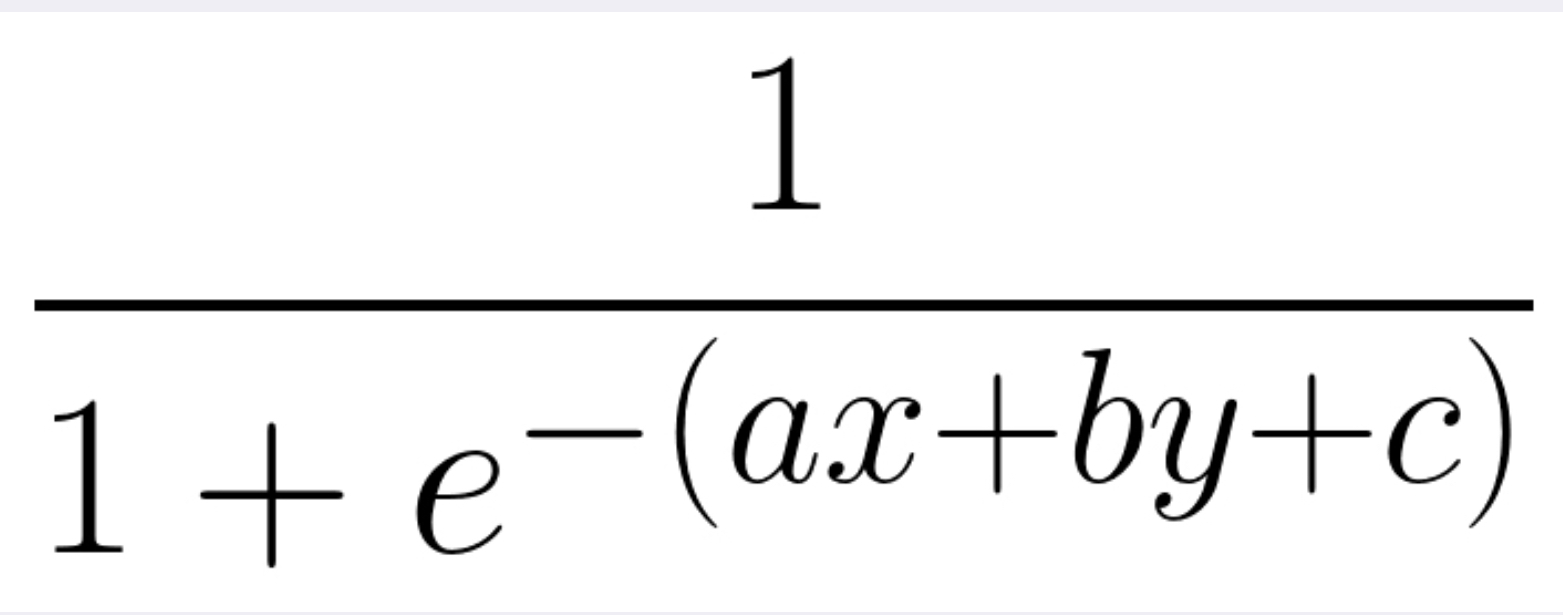

#Likelihood
To calculate how good our line is, we need to score whether our predictions are correct. Ideally if we predict with a high probability that a passenger survives (meaning the datapoint is far to the right of the line), then that passenger actually survives.

So we’ll get rewarded when we predict something correctly and penalized if we predict something incorrectly.
Here’s the likelihood equation. Though again, the intuition is more important than the equation.
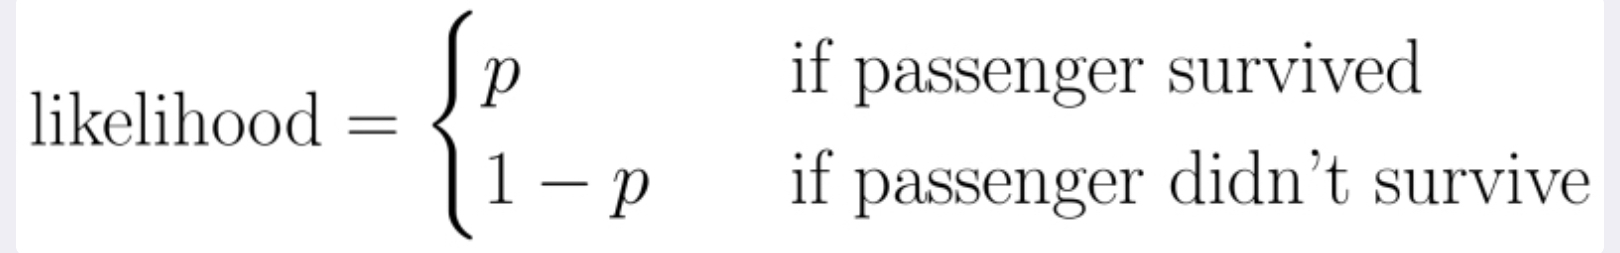

Let’s say for ease of computation that we have 4 datapoints.
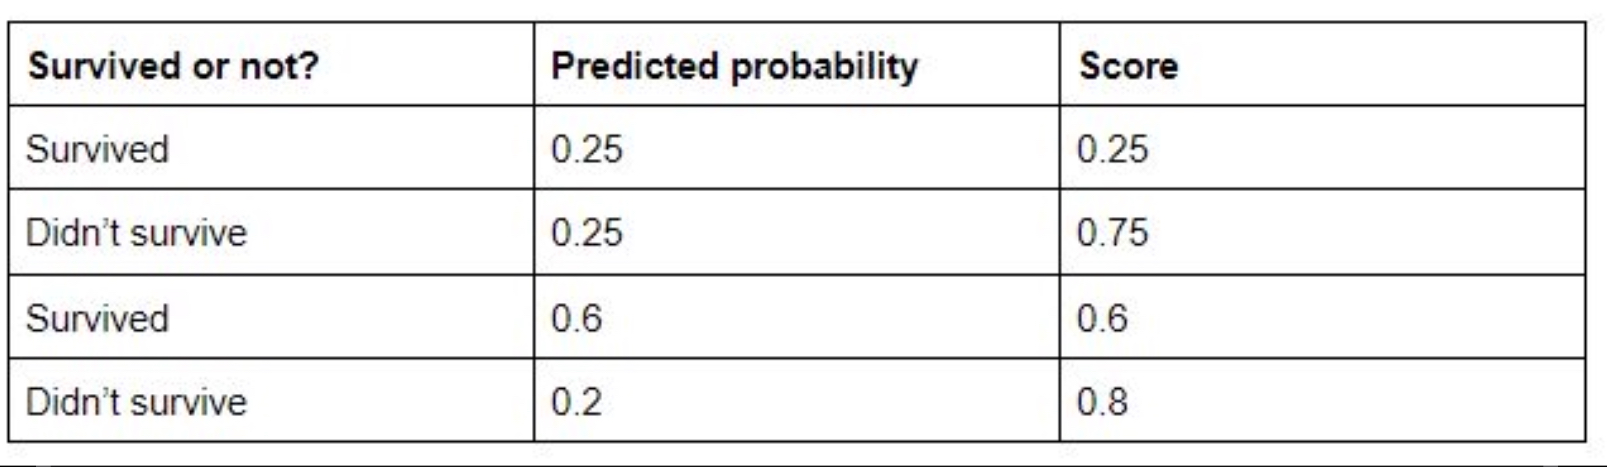

We get the total score by multiplying the four scores together:


```
0.25 * 0.75 * 0.6 * 0.8 = 0.09
```
The value is always going to be really small since it is the likelihood that our model predicts everything perfectly. A perfect model would have a predicted probability of 1 for all positive cases and 0 for all negative cases.


# Prep Data with Pandas
Before we can use sklearn to build a model, we need to prep the data with Pandas. Let’s go back to our full dataset and review the Pandas commands.

Here’s a Pandas DataFrame of data with all the columns:
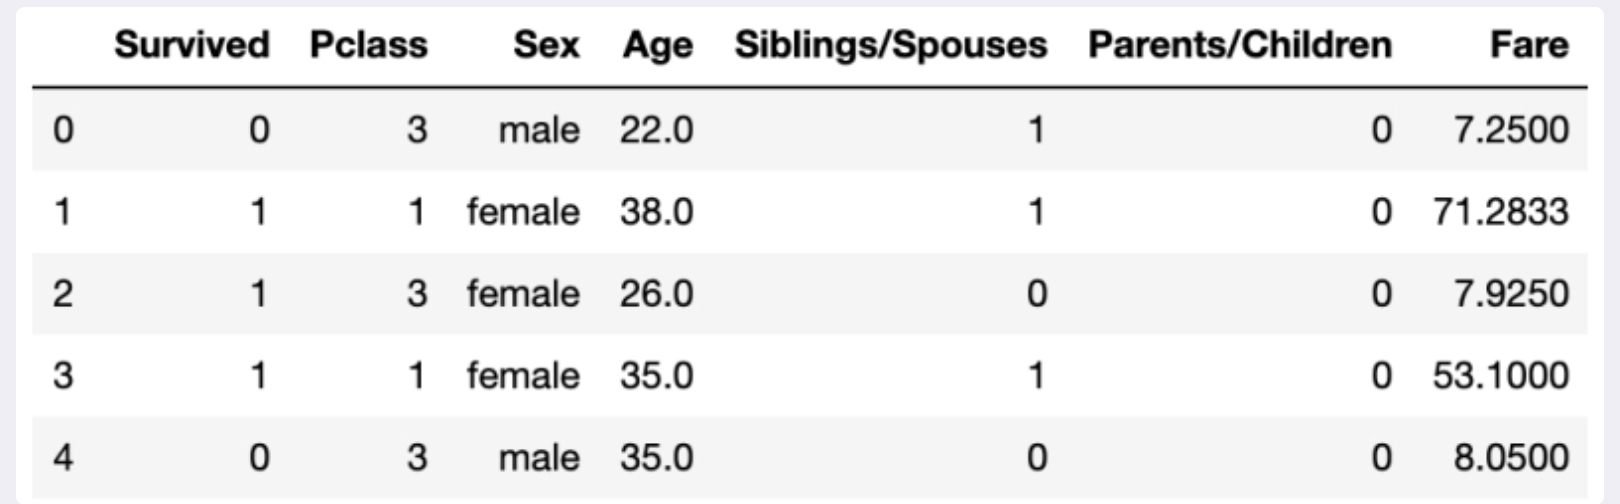


Scikit-learn is one of the best documented Python modules out there. You can find lots of code samples at scikit-learn.org

First, we need to make all our columns numerical. Recall how to create the boolean column for Sex.


```
df['male'] = df['Sex'] == 'male'
```
Now, let’s take all the features and create a numpy array called X. We first select all the columns we are interested in and then use the values method to convert it to a numpy array.


```
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
```

Now let’s take the target (the Survived column) and store it in a variable y.


```
y = df['Survived'].values
```



It’s standard practice to call our 2d array of features X and our 1d array of target values y.

In [ ]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children',
'Fare']].values
y = df['Survived'].values
print(X)
print(y)

# Build a Logistic regression model sklearn
We start by importing the Logistic Regression model:


```
from sklearn.linear_model import LogisticRegression 
```

All sklearn models are built as Python classes. We first instantiate the class.


```
model = LogisticRegression()
```

 For simplicity, let’s first assume that we’re building a Logistic Regression model using just the Fare and Age columns. First we define X to be the feature matrix and y the target array.


```
X = df[['Fare', 'Age']].values
y = df['Survived'].values
```

Now we use the fit method to build the model.


```
model.fit(X, y)
```
Fitting the model means using the data to choose a line of best fit. We can see the coefficients with the coef_ and intercept_ attributes.


```
print(model.coef_, model.intercept_)
```




In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Fare', 'Age']].values
Y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)

[[ 0.01615949 -0.01549065]] [-0.51037152]


The values above mean that the equation is as follows:


```
0 = 0.0161594x + -0.01549065y + -0.51037152
```



# Make Predictions With The Model
We really handicapped our model by only using two of the features in the previous parts, so let’s rebuild the model with all of them.


```
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
```
Now we can use the predict method to make predictions.


```
model.predict(X)
```


The first passenger in the dataset is:


```
[3, True, 22.0, 1, 0, 7.25]
```

This means the passenger is in Pclass 3, are male, are 22 years old, have 1 sibling/spouse aboard, 0 parents/child aboard, and paid $7.25. Let’s see what the model predicts for this passenger. Note that even with one datapoint, the predict method takes a 2-dimensional numpy array and returns a 1-dimensional numpy array.


```
print(model.predict([[3, True, 22.0, 1, 0, 7.25]])) 
# [0]
```
The result is 0, which means the model predicts that this passenger did not survive.

Let’s see what the model predicts for the first 5 rows of data and compare it to our target array. We get the first 5 rows of data with X[:5] and the first 5 values of the target with y[:5].


```
print(model.predict(X[:5])) 
# [0 1 1 1 0]
print(y[:5]) 
# [0 1 1 1 0]
```




In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

print(model.predict([[3, True, 22.0, 1, 0, 7.25]]))
print(model.predict(X[:5]))
print(y[:5])

[0]
[0 1 1 1 0]
[0 1 1 1 0]


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)
print(model.predict(X[:5]))

[0 1 1 1 0]


# Score The Model
We can get a sense of how good our model is by counting the number of datapoints it predicts correctly. This is called the **accuracy** score.

Let’s create an array that has the predicted y values.


```
y_pred = model.predict(y)
```
Now we create an array of boolean values of whether or not our model predicted each passenger correctly.


```
y == y_pred
```

To get the number of these that are true, we can use the numpy sum method.


```
print((y == y_pred).sum())
```

This means that of the 887 datapoints, the model makes the correct prediction for 714 of them.

To get the percent correct, we divide this by the total number of passengers. We get the total number of passengers using the shape attribute.


```
y.shape[0]
```

Thus our accuracy score is computed as follows.



```
print((y == y_pred).sum() / y.shape[0])
```

Thus the model’s accuracy is 80%. In other words, the model makes the correct prediction on 80% of the datapoints.

This is a common enough calculation, that sklearn has already implemented it for us. So we can get the same result by using the **score method**. The score method uses the model to make a prediction for X and counts what percent of them match y.


```
print(model.score(X, y))
```




In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print((y == y_pred).sum())
print((y == y_pred).sum() / y.shape[0])
print(model.score(X, y))

714
0.8049605411499436
0.8049605411499436


# Breast Cancer Data Set
Let’s start by loading the dataset and taking a peak at the data and how it’s formatted.


```
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
```

The object returned (which we stored in the cancer_data variable) is an object similar to a Python dictionary. We can see the available keys with the keys method.


```
print(cancer_data.keys())
```

We’ll start by looking at DESCR, which gives a detailed description of the dataset.


```
print(cancer_data['DESCR'])
```
We can see there are 30 features, 569 datapoints, and target is either Malignant (cancerous) or Benign (not cancerous). For each of the datapoints we have measurements of the breast mass (radius, texture, perimeter, etc.). For each of the 10 measurements, multiple values were computed, so we have the mean, standard error and the worst value. This results in 10 * 3 or 30 total features.


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
print(cancer_data.keys())
print(cancer_data['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

# Loading the data into pandas
The following is a numpy array of the data.

```
cancer_data['data']
```
We use the shape to see that it is an array with 569 rows and 30 columns.


```
print(cancer_data['data'].shape)
```

In order to put this in a Pandas DataFrame and make it more human readable, we want the column names. These are stored with the 'feature_names' key.


```
print(cancer_data['feature_names'])
```


Now we can create a Pandas DataFrame with all our feature data.


```
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
print(df.head())
```



In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
print(df.head())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


# Result
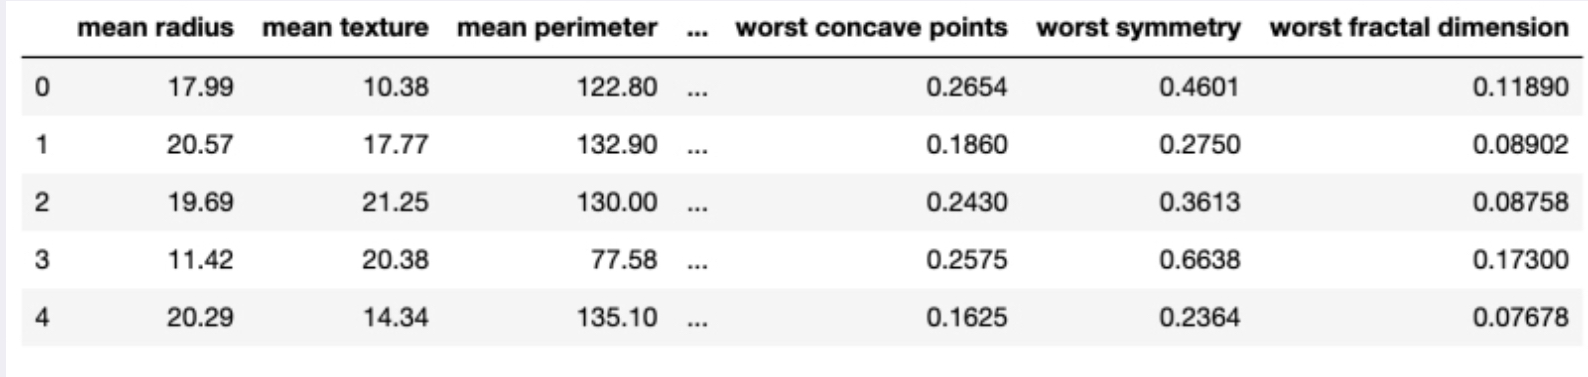




We can see that we have 30 columns in the DataFrame, since we have 30 features. The output is truncated so that it’ll fit on the screen. We used the head method, so our result only has 5 datapoints.

We still need to put the target data in our DataFrame, which can be found with the 'target' key. We can see that the target is a 1-dimensional numpy array of 1’s and 0’s.

The following is a numpy array of the data.

```
(cancer_data['target'])
```

If we look at the shape of the array, we see that it’s a 1-dimensional array with 569 values (which was how many datapoints we had).


```
cancer_data['target'].shape
```
In order to interpret these 1’s and 0’s, we need to know whether 1 or 0 is benign or malignant. This is given by the target_names


```
cancer_data['target_names']
```



This gives the array ['malignant' 'benign'] which tells us that 0 means malignant and 1 means benign. Let’s add this data to the Pandas DataFrame.


```
df['target'] = cancer_data['target']
print(df.head())
```





In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
print(df.head())

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]




#  Build a logistic regression model
Now that we’ve taken a look at our data and gotten it into a comfortable format, we can build our feature matrix X and target array y so that we can build a Logistic Regression model.


```
X = df[cancer_data.feature_names].values
y = df['target'].values
```
Now we create a Logistic Regression object and use the fit method to build the model.


```
model = LogisticRegression()
model.fit(X, y)
```

When we run this code we get a Convergence Warning. This means that the model needs more time to find the optimal solution. One option is to increase the number of iterations. You can also switch to a different solver, which is what we will do. The solver is the algorithm that the model uses to find the equation of the line. You can see the possible solvers in the Logistic Regression [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)




```
model = LogisticRegression(solver='liblinear')
model.fit(X, y) 
```
Let’s see what the model predicts for the first datapoint in our dataset. Recall that the predict method takes a 2-dimensional array so we must put the datapoint in a list.



```
model.predict([X[0]])
```


So the model predicts that the first datapoint is benign.

To see how well the model performs over the whole dataset, we use the score method to see the accuracy of the model.



```
model.score(X, y)
```



In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print("prediction for datapoint 0:", model.predict([X[0]]))
print(model.score(X, y))

prediction for datapoint 0: [0]
0.9595782073813708


[https://medium.com/dropout-analytics/beginners-guide-to-logistic-regression-with-cuml-5061086d8694](https://)